# 행정구역별 의료기관 현황 분석해보기. 
## 블록맵을 시각화 
### 필요한 데이터 준비물 
### 1) 공공보건의료 기관 현황.csv 
### 2) 행정구역별 시군구 인구수 엑셀 파일 

## 작업 
### 1. 행정구역별 주소 수정. 
### 2. 행정구역별 의료기관 수 집계
### 3. 행정구역별 인구수 정리 
### 4. 테이블 정리, 내부(공통된 행만 뽑아서), 외부(모든 행을 다 합치기)

### 블록맵: 구역의 경계선을 단순화 작업하고, -> 블록(사각형모양으로 ) 그려서 지도에 표기. 
### 히트맵으로 온도로 시각화 하는 것과 거의 비슷. 


## 데이터수집
### 준비물)
### 공공데이터 -> 공공보건 의료기관 현황 데이터 csv 다운로드 
### 1) 보건복지부 공공보건 의료기관 현황

### 2)행정구역 시군구 인구수 엑셀파일

In [43]:
import pandas as pd 
pd.set_option("mode.chained_assignment",None)
import numpy as np 

data = pd.read_csv("보건복지부_전국 지역보건의료기관 현황_20221231.csv", index_col=0, encoding="utf-8", engine="python")
data


,시군구,기관유형,상위 보건기관명,보건기관명,주소,읍면동명,도서지역 여부,대표 전화번호
시도,,,,,,,,
서울특별시,종로구,보건소,종로구보건소,종로구보건소,"서울특별시 종로구 자하문로19길 36 (옥인동, 종로구보건소, 청운효자동자치회관) ...",청운효자동,아니오,02-2148-3514
서울특별시,중구,보건소,서울중구보건소,서울중구보건소,"서울특별시 중구 다산로39길 16 (무학동, 중구보건소)",신당동,아니오,02-3396-6302
서울특별시,중구,일반보건지소,서울중구보건소,약수보건지소,"서울특별시 중구 다산로 92 (신당동, 약수동주민센터) 약수동주민센터",신당동,아니오,02-3396-6964
서울특별시,중구,일반보건지소,서울중구보건소,황학보건지소,"서울특별시 중구 난계로11길 52 (황학동, 황학동주민센터) 황학동주민센터",황학동,아니오,02-3396-6989
서울특별시,중구,일반보건지소,서울중구보건소,다산보건지소,"서울특별시 중구 동호로15길 50 (신당동, 동사무소어린이집)",신당동,아니오,02-3396-6959
...,...,...,...,...,...,...,...,...
강원특별자치도,양양군,보건진료소,양양군보건소,석교보건진료소,강원도 양양군 강현면 화채봉길 107 (석교리보건진료소),강현면,아니오,033-673-5805
강원특별자치도,양양군,보건진료소,양양군보건소,수산보건진료소,강원도 양양군 손양면 수산2길 7-1 (수산보건진료소),손양면,아니오,033-672-2177
강원특별자치도,양양군,보건진료소,양양군보건소,서림보건진료소,강원도 양양군 서면 구룡령로 2039-18 (서림보건진료소),서면,아니오,033-673-0965


In [44]:
# 공공 의료기관의 주소 데이터 정리 작업. 
# 기존 csv 파일에서 -> 주소 컬럼에 각각의 행의 내용을 공백을 기준으로 잘라서, 시도, 군구를 뽑는 작업
# 반환 타입 -> 새로운 DataFrame (표)
addr =pd.DataFrame(data["주소"].apply(lambda v : v.split()[:2]).tolist(), columns=["시도","군구"])
addr.head()

,시도,군구
0,서울특별시,종로구
1,서울특별시,중구
2,서울특별시,중구
3,서울특별시,중구
4,서울특별시,중구


In [45]:
# 해당 주소에서 1차 지역명, 2차 지역명으로 추출후 , 중복 제거
print(len(addr["시도"].unique()))
addr["시도"].unique()

18


array(['서울특별시', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도',
       '세종특별자치시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '강원특별자치도'], dtype=object)

In [46]:
# 수정1 작업
# addr[addr["시도"] == "강원특별자치도"]
# 강원도 -> 강원특별자치도 , 변경해보기.
# 기본 문법
# addr.loc[<행 조건>, <열 이름>] = <새로운 값>
# addr.loc[addr['시도'] == '강원도', '시도'] = '강원특별자치도'

# 수정2 작업
addr[addr["시도"] == "전북특별자치도"]
# addr.loc[addr['시도'] == '전라북도', '시도'] = '전북특별자치도'

addr["시도"].unique()


array(['서울특별시', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도',
       '세종특별자치시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '강원특별자치도'], dtype=object)

In [47]:
# 1차 지역명 통일하기

print(len(addr["시도"].unique()))
addr["시도"].unique()





18


array(['서울특별시', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도',
       '세종특별자치시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '강원특별자치도'], dtype=object)

In [48]:
# 2차 지역명 데이터 확인.
# 2차 지역명이 나중에, 블록맵에서, 분할 되는 공간과 매칭이 안됨.
# 최신 2차 지역명으로 작업시, 그림이 깨지는 문제가 있다.
# 그래서, 일단, 2차 지역명은 예전 데이터로 이용할 예정.
# print(len(addr["군구"].unique()))
# addr["군구"].unique()
print(len(addr['군구'].str.endswith(('면','로')).unique()))
condition = addr['군구'].str.endswith(('면','로'))
result = addr[condition]
print(result)

#작업1
# ~면, ~로 끝나는 지역명 조사 해보기.


2
           시도   군구
2768  세종특별자치시  부강면
2769  세종특별자치시  장군면
2770  세종특별자치시  장군면
2772  세종특별자치시  당산로
2773  세종특별자치시  연동면
2774  세종특별자치시  연서면
2775  세종특별자치시  소정면
2776  세종특별자치시  금남면
2777  세종특별자치시  전의면
2778  세종특별자치시  전동면
2779  세종특별자치시  새롬로
2780  세종특별자치시  마음로
2781  세종특별자치시  연서면
2782  세종특별자치시  전의면
2783  세종특별자치시  전동면
2784  세종특별자치시  연서면
2785  세종특별자치시  연동면
2786  세종특별자치시  금남면


In [49]:
print(len(addr["군구"].unique()))
addr["군구"].unique()

218


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '청주시', '충주시',
       '제천시', '보은군', '옥천군', '영동군', '증평군', '진천군', '괴산군', '음성군', '단양군',
       '천안시', '공주시', '보령시', '아산시', '서산시', '논산시', '계룡시', '당진시', '금산군',
       '부여군', '서천군', '청양군', '홍성군', '예산군', '태안군', '전주시', '군산시', '익산시',
       '정읍시', '남원시', '김제시', '완주군', '진안군', '무주군', '장수군', '임실군', '순창군',
       '고창군', '부안군', '목포시', '여수시', '순천시', '나주시', '광양시', '담양군', '곡성군',
       '구례군', '고흥군', '보성군', '화순군', '장흥군', '강진군', '해남군', '영암군', '무안군',
       '함평군', '영광군', '장성군', '완도군', '진도군', '신안군', '포항시', '경주시', '김천시',
       '안동시', '구미시', '영주시', '영천시', '상주시', '문경시', '경산시', '군위군', '의성군',
       '청송군', '영양군', '영덕군', '청도군', '고령군', '성주군', '칠곡군', '예천군', '봉화군',
       '울진군', '울릉군', '창원시', '진주시', '통영시', '사천시', '김해시', '밀양시', '거제시',
       '양산시', '의령군', '함안군', '창녕군', '고성군', '남해군', '하동군', '산청군', '함양군',
       '거창군', '합천군

In [50]:
# 행정구역별 의료기관 수 확인 하기. 
# 시도 명칭 통일 및 군구 공백 제거 후, 새 컬럼 추가. 시도군구
province_aliases = {"강원도":"강원특별자치도","전라북도":"전북특별자치도","제주도":"제주특별자치도"}
addr["시도"] = addr["시도"].map(lambda v: province_aliases.get(v, v))  # 한글 시도명 통일
addr["군구"] = addr["군구"].astype(str).str.strip()  # 좌우 공백 제거

addr["시도군구"] = addr.apply(lambda r: r["시도"]+" "+r["군구"], axis=1)
print(len(addr["시도군구"]))
print(len(addr["시도군구"].unique()))
# addr.head()
addr


3598
240


,시도,군구,시도군구
0,서울특별시,종로구,서울특별시 종로구
1,서울특별시,중구,서울특별시 중구
2,서울특별시,중구,서울특별시 중구
3,서울특별시,중구,서울특별시 중구
4,서울특별시,중구,서울특별시 중구
...,...,...,...
3593,강원특별자치도,양양군,강원특별자치도 양양군
3594,강원특별자치도,양양군,강원특별자치도 양양군
3595,강원특별자치도,양양군,강원특별자치도 양양군
3596,강원특별자치도,양양군,강원특별자치도 양양군


In [51]:
# addr  위에 주소에, count 컬럼 추가하기. 
addr["count"] = 0
addr.head()

,시도,군구,시도군구,count
0,서울특별시,종로구,서울특별시 종로구,0
1,서울특별시,중구,서울특별시 중구,0
2,서울특별시,중구,서울특별시 중구,0
3,서울특별시,중구,서울특별시 중구,0
4,서울특별시,중구,서울특별시 중구,0


In [52]:
# 시도 군구에 대해서 갯수 집계 해보기. 
# 위에 컬럼 생성시 시도군구 뒤에 공백 들어가서 인식을 못함. 오류 
# 이 결과가, 시군구 별 -> 의료기관의 수를 집계
addr_group = pd.DataFrame(addr.groupby(["시도", "군구","시도군구"], as_index=False).count())
addr_group.head(3000)

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,19
1,강원특별자치도,고성군,강원특별자치도 고성군,14
2,강원특별자치도,동해시,강원특별자치도 동해시,4
3,강원특별자치도,삼척시,강원특별자치도 삼척시,15
4,강원특별자치도,속초시,강원특별자치도 속초시,1
...,...,...,...,...
235,충청북도,제천시,충청북도 제천시,21
236,충청북도,증평군,충청북도 증평군,3
237,충청북도,진천군,충청북도 진천군,15
238,충청북도,청주시,충청북도 청주시,44


In [53]:
# 인덱스, 시도군구로 설정하기. 
# 행정구역별 의료기관 테이블 ------ 행정구역별 인구수 테이블, 조인 ,
# 병합하기 위해서,
# 공통의 인덱스 요소를 맞추기( 깔 맞춤.)
addr_group = addr_group.set_index("시도군구")
addr_group.to_csv("./addr_group.csv", encoding="utf-8", index=False)
# addr_group.head()
addr_group

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19
강원특별자치도 고성군,강원특별자치도,고성군,14
강원특별자치도 동해시,강원특별자치도,동해시,4
강원특별자치도 삼척시,강원특별자치도,삼척시,15
강원특별자치도 속초시,강원특별자치도,속초시,1
...,...,...,...
충청북도 제천시,충청북도,제천시,21
충청북도 증평군,충청북도,증평군,3
충청북도 진천군,충청북도,진천군,15


In [54]:
# 행정구역별 시군구 인구수 엑셀 파일 정리  -> 인구수 , 2025.1
# 해당 데이터 강원도 부분 인덱스 불일치, 임시로 강원도로 해둠.
population = pd.read_excel("./행정구역_시군구_별__성별_인구수2.xlsx")
# population.head()
population


,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51207874,25492996,25714878
1,서울특별시,소계,9330658,4504432,4826226
2,서울특별시,종로구,138208,66514,71694
3,서울특별시,중구,120325,57948,62377
4,서울특별시,용산구,203727,97392,106335
...,...,...,...,...,...
288,경상남도,거창군,59514,29241,30273
289,경상남도,합천군,40133,19738,20395
290,제주특별자치도,소계,669460,334794,334666
291,제주특별자치도,제주시,487623,243336,244287


In [55]:
# 1차 지역명, 2차 지역명, 모양 맞추기. 
# 	행정구역(시군구)별(1) : 시도
# 	행정구역(시군구)별(2) : 군구
population = population.rename(columns={"행정구역(시군구)별(1)" : "시도","행정구역(시군구)별(2)" : "군구"}) 

# 시도 명칭 통일(강원/전북/제주 특별자치도) 및 군구 공백 제거
province_aliases = {"강원도":"강원특별자치도","전라북도":"전북특별자치도","제주도":"제주특별자치도"}
population["시도"] = population["시도"].map(lambda v: province_aliases.get(v, v))
population["군구"] = population["군구"].astype(str).str.strip()

population.head()


,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51207874,25492996,25714878
1,서울특별시,소계,9330658,4504432,4826226
2,서울특별시,종로구,138208,66514,71694
3,서울특별시,중구,120325,57948,62377
4,서울특별시,용산구,203727,97392,106335


In [56]:
# 군구 부분에 왼쪽 공백 제거, 새 컬럼 추가 -> 시도군구 
# 시도군구 새 컬럼을 -> 인덱스로 설정. 
# for element in range (0, len(population)):
#   population["군구"][element] = population["군구"][element].strip()

# 시도군구 새컬럼 추가 
population["시도군구"] = population.apply(lambda r: r["시도"] + " " + r["군구"], axis=1)

population.head()


,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,합계,51207874,25492996,25714878,전국 합계
1,서울특별시,소계,9330658,4504432,4826226,서울특별시 소계
2,서울특별시,종로구,138208,66514,71694,서울특별시 종로구
3,서울특별시,중구,120325,57948,62377,서울특별시 중구
4,서울특별시,용산구,203727,97392,106335,서울특별시 용산구


In [57]:

# 소계 부분 제거하기. 
population = population[population.군구 != "소계"]

population = population[population.군구 != "합계"]


population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,138208,66514,71694,서울특별시 종로구
3,서울특별시,중구,120325,57948,62377,서울특별시 중구
4,서울특별시,용산구,203727,97392,106335,서울특별시 용산구
5,서울특별시,성동구,273549,132354,141195,서울특별시 성동구
6,서울특별시,광진구,331589,158992,172597,서울특별시 광진구


In [58]:
# 인덱스 설정. 
population = population.set_index("시도군구")
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,138208,66514,71694
서울특별시 중구,서울특별시,중구,120325,57948,62377
서울특별시 용산구,서울특별시,용산구,203727,97392,106335
서울특별시 성동구,서울특별시,성동구,273549,132354,141195
서울특별시 광진구,서울특별시,광진구,331589,158992,172597


In [59]:
# 데이터 병합 (내부 조인, 인덱스를 기준으로, 같은 행 기준으로 합치기함.  )
# 내부 조인 -> 인덱스를 기준으로, 시도군구의 행이 같은 것들만 모아서 합침. 
# 외부 조인 -> 같은행 상관없이 모두 합치기. 
addr_population_merge = pd.merge(addr_group, population, how="inner", left_index=True, right_index=True)
print(addr_population_merge.shape)
addr_population_merge.to_csv('./addr_population_merge.csv',encoding='utf-8')
addr_population_merge.head(1000)


(227, 8)


,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,강원특별자치도,강릉시,207543,102789,104754
강원특별자치도 고성군,강원특별자치도,고성군,14,강원특별자치도,고성군,26920,13798,13122
강원특별자치도 동해시,강원특별자치도,동해시,4,강원특별자치도,동해시,87571,44439,43132
강원특별자치도 삼척시,강원특별자치도,삼척시,15,강원특별자치도,삼척시,61464,31279,30185
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,80754,39851,40903
...,...,...,...,...,...,...,...,...
충청북도 제천시,충청북도,제천시,21,충청북도,제천시,128352,64697,63655
충청북도 증평군,충청북도,증평군,3,충청북도,증평군,37160,19346,17814
충청북도 진천군,충청북도,진천군,15,충청북도,진천군,86429,45679,40750


In [60]:
# 필요한 컬럼만 추출 , 총 4개의 컬럼이 필요함
# 행정구역별 의료기관의 인구수 대비의 비율를 구하는게 목적. 
# count -> 의료기관수
# 시도_x	군구_x	count		총인구수 (명), 
local_Hospital_Population = addr_population_merge[["시도_x", "군구_x", "count", "총인구수 (명)"]]
local_Hospital_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,207543
강원특별자치도 고성군,강원특별자치도,고성군,14,26920
강원특별자치도 동해시,강원특별자치도,동해시,4,87571
강원특별자치도 삼척시,강원특별자치도,삼척시,15,61464
강원특별자치도 속초시,강원특별자치도,속초시,1,80754


In [61]:
# 컬럼 이름 조정, 인구수 대비 의료기관 비율 새컬럼 추가. 
local_Hospital_Population = local_Hospital_Population.rename(columns= {"시도_x": "시도","군구_x" :"군구", "총인구수 (명)" : "인구수"})
# local_Hospital_Population.head()
local_Hospital_Population



,시도,군구,count,인구수
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,207543
강원특별자치도 고성군,강원특별자치도,고성군,14,26920
강원특별자치도 동해시,강원특별자치도,동해시,4,87571
강원특별자치도 삼척시,강원특별자치도,삼척시,15,61464
강원특별자치도 속초시,강원특별자치도,속초시,1,80754
...,...,...,...,...
충청북도 제천시,충청북도,제천시,21,128352
충청북도 증평군,충청북도,증평군,3,37160
충청북도 진천군,충청북도,진천군,15,86429


In [62]:
#새 컬럼HS_ratio : (병원의 숫자 / 인구수 ) * 100000 = 비율 
HS_count = local_Hospital_Population["count"]
local_Hospital_Population["HS_ratio"] = HS_count.div(local_Hospital_Population["인구수"], axis=0)*100000
# local_Hospital_Population.head()
local_Hospital_Population.to_csv('./addr_population_merge2.csv',encoding='utf-8')
local_Hospital_Population

,시도,군구,count,인구수,HS_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,207543,9.154729
강원특별자치도 고성군,강원특별자치도,고성군,14,26920,52.005944
강원특별자치도 동해시,강원특별자치도,동해시,4,87571,4.567722
강원특별자치도 삼척시,강원특별자치도,삼척시,15,61464,24.404529
강원특별자치도 속초시,강원특별자치도,속초시,1,80754,1.238329
...,...,...,...,...,...
충청북도 제천시,충청북도,제천시,21,128352,16.361257
충청북도 증평군,충청북도,증평군,3,37160,8.073197
충청북도 진천군,충청북도,진천군,15,86429,17.355286


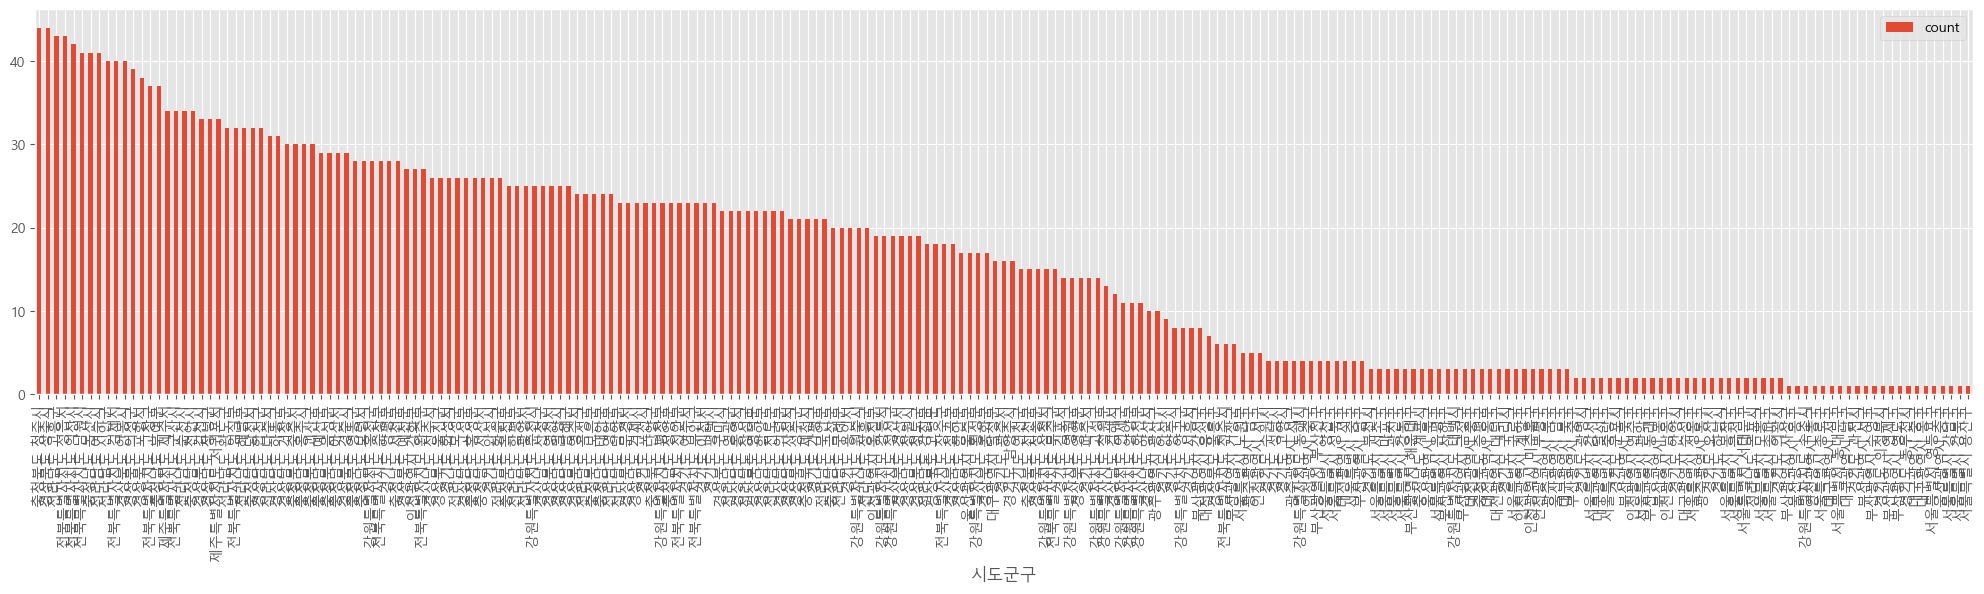

In [63]:
# 막대 그래프만 그리기. 
# 블록맵은 추가 설정이 필요해서, 다음시간에 
from matplotlib import pyplot as plt 
from matplotlib import rcParams, style
# R 프로그래밍 -> 시각화 할 때, 해당 그림의 속성을 좀더 편하게 지정하는 템플릿 
# gg -> gramar graph , 도표를 작성시 필요한 구문(문법)-> 도표, 크기, 색갈, 폰트, 등. 
style.use("ggplot")

# 폰트를 지정. font_manager
# rc -> runtime configuration , 표의 속성을 전역으로 설정하는 , 모듈 (도구)
# 한번, 표에 관련된 설정을 해두면, 밑에서 다른 도표에서 사용시, 전역으로 설정이 되었으니, 따로 할 필요가 없다.
from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgunbd.ttf").get_name()
rc("font", family = font_name)

# local_Hospital_Population["count"] -> 반환값 시리즈 , 시리즈(행, 열 1개로 표현을 하는 타입)
# local_Hospital_Population[["count"]] -> 반환값 데이터 프레임(표)
HS_ratio = local_Hospital_Population[["count"]]
# HS_ratio -> 타입 : DataFrame 표. 
# count 컬럼의 값들을 , 오름 차순 False -> 내림 차순, 
HS_ratio = HS_ratio.sort_values("count", ascending=False)
# 30 , 단위 인치, 
plt.rcParams["figure.figsize"] = (25,5)
# rot = 80, x 라벨의 표기의 기울기
if HS_ratio.empty:
  print("경고: count 데이터가 비어 있어 막대그래프를 생략합니다.")
else:
  HS_ratio.plot(kind = "bar", rot = 90)
plt.show()



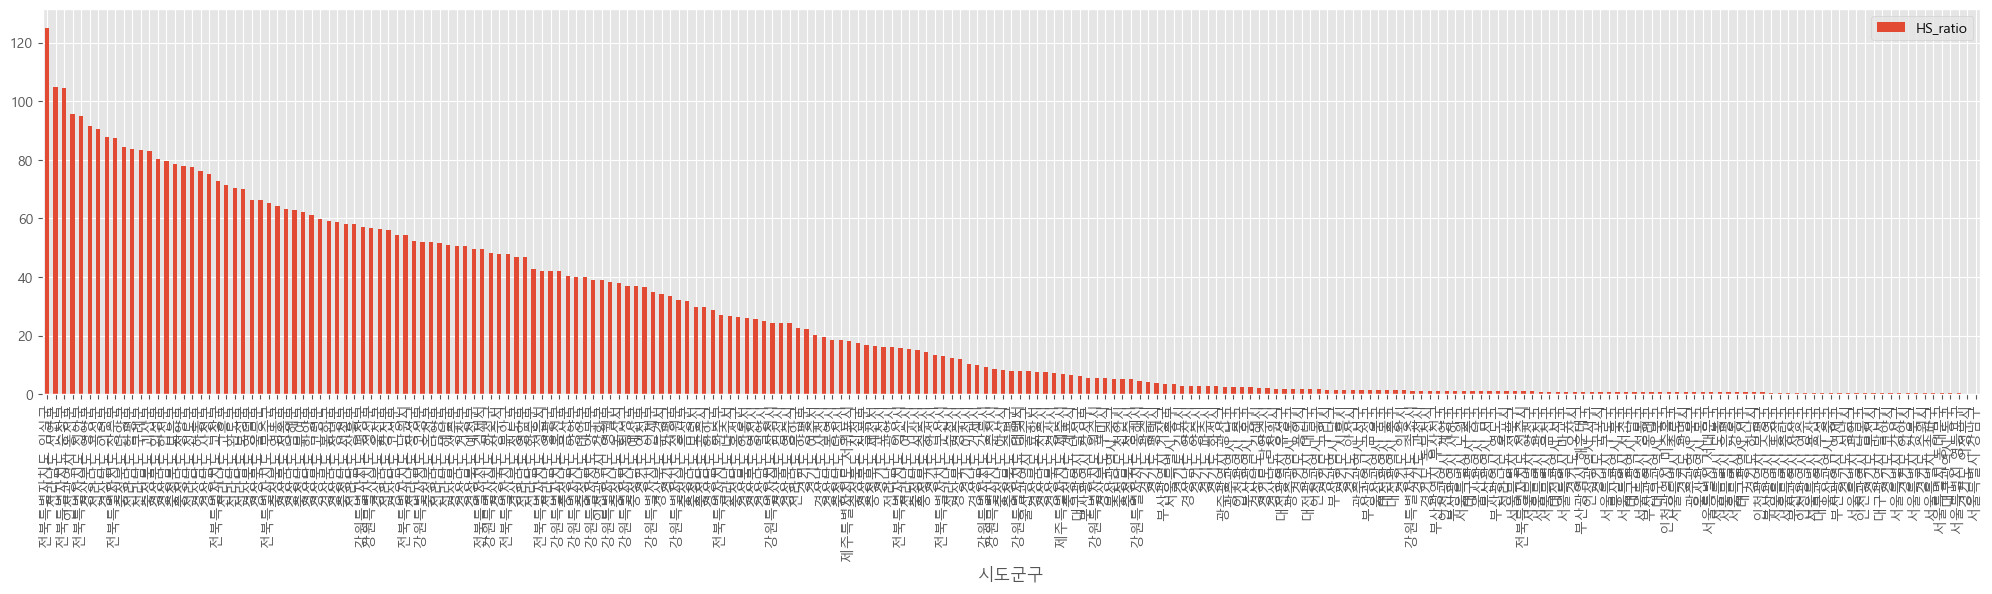

In [64]:
HS_ratio = local_Hospital_Population[["HS_ratio"]]
# HS_ratio -> 타입 : DataFrame 표. 
# count 컬럼의 값들을 , 오름 차순 False -> 내림 차순, 
HS_ratio = HS_ratio.sort_values("HS_ratio", ascending=False)
# 30 , 단위 인치, 
plt.rcParams["figure.figsize"] = (25,5)
# rot = 80, x 라벨의 표기의 기울기
if HS_ratio.empty:
  print("경고: HS_ratio 데이터가 비어 있어 막대그래프를 생략합니다.")
else:
  HS_ratio.plot(kind = "bar", rot = 90)
plt.show()

In [65]:
# 블록맵 준비 
# 블록맵을 구성하는 , 각 지역마다, 특정의 임의의 좌표로한 데이터 가 필요.
# 블록맵을 경계를 나눌 샘플 좌표 데이터가 필요. 
# 데이터 출처를 조사, 

# 준비물 1 : data_draw_korea.csv
# 준비물 2
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [66]:
import os 
# 현재 작업 중 폴더 경로 불러오기. 
path = os.getcwd()
path


'D:\\Python-workspace-250901\\4-Python-Analysis-Visual\\ch3-지도맵통계'

In [67]:
# 준비물 1번 메모리에 올리기. 
# index_col=0 -> 첫번째 열을 , 데이터프레임의 인덱스로 사용함.
data_draw_korea = pd.read_csv(path+"\\data_draw_korea.csv", index_col=0, encoding="utf-8", engine="python")
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [68]:
#행정 구역 지역명 추출 작업. 
# 광역시도 열, 행정구역 열 추출해서, 새로운 시도군구 열을 추가하기.
addr_aliases = {'강원도' :'강원특별자치도', '전라북도':'전북특별자치도', '제주도':'제주특별자치도'}
data_draw_korea["광역시도"]= data_draw_korea['광역시도'].apply(lambda r: addr_aliases.get(r,r))
data_draw_korea.head(300)

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
2,86747,동해,11,5,180.01,강원특별자치도,동해시
3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
4,76733,속초,9,1,105.25,강원특별자치도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시


In [69]:
# 데이터 프레임 병합 할려면, 인덱스 동일하게 맞추는 작업(깔 맞춤)
# 시도군구 열 -> 인덱스로 설정.
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] +' '+r['행정구역'], axis=1)
data_draw_korea = data_draw_korea.set_index("시도군구")
# data_draw_korea.head()
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [70]:
#data_draw_korea 의 테이블, 기존에 사용하던, local_Hospital_Population , 
# 조인 , 외부조인,-> 해당 조건에서 값이 일치 하지 않는 행까지(모두 다 합침. )
# 만약, 해당 값이 없다면 -> NaN 집계가 됨. 

data_draw_korea_local_Hospital_Population = pd.merge(data_draw_korea,local_Hospital_Population, how="outer", left_index=True, right_index=True)

# 제주 좌표 누락 시 보정: 제주시/서귀포시 존재하는데 좌표 NaN이면 기본 좌표 대입
jeju_mask = data_draw_korea_local_Hospital_Population["광역시도"].fillna("").str.contains("제주")
if jeju_mask.any():
  # x,y가 NaN인 행만 보정
  missing_xy = data_draw_korea_local_Hospital_Population[jeju_mask] [["x","y"]].isna().any(axis=1)
  # 기본 좌표(임의, 격자 내 남서쪽 배치). 필요시 조정 가능
  default_coords = {
    "제주특별자치도 제주시": (0, 21),
    "제주특별자치도 서귀포시": (1, 21),
  }
  for key, (dx, dy) in default_coords.items():
    if key in data_draw_korea_local_Hospital_Population.index:
      if np.isnan(data_draw_korea_local_Hospital_Population.loc[key, "x"]) or np.isnan(data_draw_korea_local_Hospital_Population.loc[key, "y"]):
        data_draw_korea_local_Hospital_Population.loc[key, ["x","y"]] = [dx, dy]

data_draw_korea_local_Hospital_Population
# data_draw_korea_local_Hospital_Population.head()
# data_draw_korea_local_Hospital_Population[["광역시도","행정구역"]]


,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,HS_ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,19.0,207543.0,9.154729
강원특별자치도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원특별자치도,고성군,강원특별자치도,고성군,14.0,26920.0,52.005944
강원특별자치도 동해시,86747.0,동해,11.0,5.0,180.01,강원특별자치도,동해시,강원특별자치도,동해시,4.0,87571.0,4.567722
강원특별자치도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,15.0,61464.0,24.404529
강원특별자치도 속초시,76733.0,속초,9.0,1.0,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,80754.0,1.238329
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462.0,제천,8.0,10.0,882.47,충청북도,제천시,충청북도,제천시,21.0,128352.0,16.361257
충청북도 증평군,34480.0,증평,6.0,11.0,81.84,충청북도,증평군,충청북도,증평군,3.0,37160.0,8.073197
충청북도 진천군,62809.0,진천,5.0,11.0,406.08,충청북도,진천군,충청북도,진천군,15.0,86429.0,17.355286


In [71]:
min(data_draw_korea_local_Hospital_Population["count"])

1.0

In [72]:
max(data_draw_korea_local_Hospital_Population["count"])

44.0

In [73]:
data_draw_korea_local_Hospital_Population["count"].unique()

array([19., 14.,  4., 15.,  1.,  8., 11., 20., 13., 25.,  3., 23., 28.,
       17., 21.,  2., 16.,  9., 26., 30., 12., 10., 22., 33., 31., 32.,
       29., 18., nan, 44., 40., 24., 27.,  6., 39., 38.,  5.,  7., 43.,
       34., 41., 37., 42.])

In [74]:
# fillna를 사용해 'count' 열의 NA 값을 위에서 구한 평균값으로 대체합니다.
# inplace=True 옵션은 원본 데이터프레임을 직접 수정하라는 의미입니다.
data_draw_korea_local_Hospital_Population['count'].fillna(data_draw_korea_local_Hospital_Population['count'].mean(), inplace=True)

C:\Users\it\AppData\Local\Temp\ipykernel_7904\2896284267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_draw_korea_local_Hospital_Population['count'].fillna(data_draw_korea_local_Hospital_Population['count'].mean(), inplace=True)


In [75]:
data_draw_korea_local_Hospital_Population['HS_ratio'].fillna(data_draw_korea_local_Hospital_Population['HS_ratio'].mean(), inplace=True)

C:\Users\it\AppData\Local\Temp\ipykernel_7904\1123453816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_draw_korea_local_Hospital_Population['HS_ratio'].fillna(data_draw_korea_local_Hospital_Population['HS_ratio'].mean(), inplace=True)


In [76]:
data_draw_korea_local_Hospital_Population["HS_ratio"].unique()

array([  9.15472938,  52.00594354,   4.56772219,  24.40452948,
         1.23832875,  38.925652  ,  40.04368402,  38.24823102,
         5.52243628,  35.04859009,  56.73843581,  32.17184716,
         8.7454174 ,   7.92079208,  57.06488029,  42.0035703 ,
        48.32191179,  36.92681973,  33.61505955,   0.37413563,
         1.16957696,   0.71478351,   4.0260688 ,   1.60541131,
         0.78267778,   2.87680494,   2.18522216,   1.15198083,
         0.39007443,   0.43825627,   0.33549842,   1.54586086,
         1.45306362,  13.40157829,   0.35844735,   2.76312745,
        22.0834122 ,  20.07646515,  36.68019758,   0.82434115,
         1.83968269,   1.295748  ,   0.21685294,  10.34079669,
         2.72571341,   3.83884848,  16.26085235,   0.60813379,
         2.67535127,   9.88070127,  50.40830729,  54.26502202,
         2.25698395,  62.92474201,  24.86473584,  19.36912009,
        75.29440111,   2.7783952 ,  87.67035945,   7.68210277,
        58.88650964,   1.90114259,  18.60465116,  76.20

In [77]:
# 준비물 2번 -> 지도에 , 각 2차지역을 사각형(블록)을 나누는 경계선 좌표.
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],  # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)],  # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)],  # 경기도
    [(9, 12), (9, 10), (8, 10)],  # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)],  # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)],  # 충청북도
    [(14, 4), (15, 4), (15, 6)],  # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)],  # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)],  # 대구시
    [(15, 11), (16, 11), (16, 13)],  # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)],  # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)],  # 광주시
    [(18, 5), (20, 5), (20, 6)],  # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)],  # 부산시
]


In [78]:
# 힘든 작업, 블록 맵을 그리기 위한 함수를 설정.
# 이미 만들어진 함수를 재사용. 
# blockedMap : 원본 데이터 프레임, 
# ex) data_draw_korea_local_Hospital_Population : 외부 조인한 원본 데이터 
# targetData : 내가 찾고자하는 결과데이터(종속변수)
# 예) 의료기관의 수 : count , 인구수 대비 의료기관의 비율 :  HS_ratio
# title, color : 도표의 제목과, 색깔. 

def draw_blockMap(blockedMap, targetData, title, color):
  # 블록맥의 각 구역의 색깔을 지정시, 최소 비율 -> 흰색 가까운 임의의 비율 색. 
  # 히트맵에서, 연관관계 가 높으면 색깔이 진한색(빨간,파란)
  whitelabelmin = (max(blockedMap[targetData])- min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
  # test 샘플값 
  print(f"whitelabelmin 전 : {whitelabelmin}")
  # whitelabelmin = 2.5
  print(f"whitelabelmin 후 : {whitelabelmin}")

  # 라벨 이름 
  datalabel = targetData  

  # vmin , vmax , -> 색깔을 표현하기 위한 최소, 최대 값으로 활용할 예정. 
  vmin = min(blockedMap[targetData])
  print(f"vmin 전 : {vmin}")
  # vmin = 1.0
  print(f"vmin 후 : {vmin}")
  vmax = max(blockedMap[targetData])
  print(f"vmax 전 : {vmax}")
  # vmax = 7.0
  print(f"vmax 후 : {vmax}")

  # pivot 함수를 이용해서, 기존의 행과 열을 , 새로운 데이터프레임(테이블)로 재배치하는 함수. 
  # index = "y" : 행, columns = "x" : 열 , 그 안에 값으로 : targetData
  mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
  print(f"mapdata : {mapdata}")

  # 여백 제거: 전체가 NaN인 행/열 잘라내기 및 좌표 오프셋 계산
  pruned_mapdata = mapdata.dropna(axis=0, how='all').dropna(axis=1, how='all')
  x_offset = pruned_mapdata.columns.min() if len(pruned_mapdata.columns) else 0
  y_offset = pruned_mapdata.index.min() if len(pruned_mapdata.index) else 0

  # 전처리, NaN 없애기. 
  masked_mapdata = np.ma.masked_where(np.isnan(pruned_mapdata), pruned_mapdata)
  print(f"masked_mapdata : {masked_mapdata}")

  # 그래프 옵션 
  # 8 인치, 13인치. 
  plt.figure(figsize=(8,13))
  # 제목은 함수의 인자값으로 들어고 됨. 
  plt.title(title)
  
  # 그래프 색깔. cmap = color -> 인자값으로 받을 예정, 빨간, 파란 
  # 블록맵의 각 사각형의 색깔을 지정하는 로직. 
  plt.pcolor(masked_mapdata, vmin = vmin , vmax = vmax , cmap = color, edgecolor = "#aaaaaa", linewidth = 0.5)

  #지역 이름표시. 
  # 원본 데이터를 반복문을 전체 조회를 해서, 각 지역명을 표기하는 방식
  # idx : 각 행의 인덱스, row : 각 행 
  for idx, row in blockedMap.iterrows():
    # 지도에 표시되는 지역명, 주석처리 사용이됨, 옵션 설정. 
    annocolr = "white" if row[targetData] > whitelabelmin else "black"

    # 광역시 = 시도, 행정구역 = 군구, 
    # 부산 강서구, 서울 강서구, 
    # 부산 동구, 서울, 인천 , 동구, 서구 , 중구 , 겹침. 
    # 2차지역명으로 만 표기시 중복이 되므로, 1차 지역명과 같이 표기 하는 방법. 

   
    # 부산
    # 서구
    # row["광역시도"][:2], 2 끝 미포함 , 0,1 ex) 부산광역시 -> 부산
    # row["행정구역"][:-1], -1 맨마지막 의미 미포함, 맨마지막 한글자 제외하고 전부
    #  ex) 강릉시 ->  강릉 
    # row["행정구역"][-1], 마지막 글자를 의미함. 
    #  ex) 강릉시 ->  시
    # ex) 부산광역시 , 
    # 안전 처리: 결측치/비문자 방지
    province_name = "" if pd.isna(row["광역시도"]) else str(row["광역시도"])  # 광역시도 문자열 보장
    district_name = "" if pd.isna(row["행정구역"]) else str(row["행정구역"])  # 행정구역 문자열 보장

    # -------- 2글자 축약 규칙 함수들 --------
    def get_province_short2(full_name: str) -> str:
      """광역시/도 이름을 표준 2글자(또는 관용 약칭)으로 변환"""
      if not isinstance(full_name, str) or full_name.strip() == "":
        return ""
      alias = {
        # 특별/광역/도 약칭
        "서울특별시": "서울", "부산광역시": "부산", "대구광역시": "대구", "인천광역시": "인천",
        "광주광역시": "광주", "대전광역시": "대전", "울산광역시": "울산", "세종특별자치시": "세종",
        "경기도": "경기", "강원도": "강원", "강원특별자치도": "강원",
        "충청북도": "충북", "충청남도": "충남",
        "전라북도": "전북", "전라남도": "전남",
        "경상북도": "경북", "경상남도": "경남",
        "제주도": "제주", "제주특별자치도": "제주",
      }
      if full_name in alias:
        return alias[full_name]
      base = full_name
      for suffix in ("특별자치도","광역시","특별시","자치시","자치도","도","시"):
        if base.endswith(suffix):
          base = base[:-len(suffix)]
          break
      return base[:2]

    def get_district_short2(full_name: str) -> str:
      """군/구/시 이름을 2글자 내로 축약 (괄호/접미사/방향/시·군 포함 복합명 처리)"""
      if not isinstance(full_name, str) or full_name.strip() == "":
        return ""
      name = full_name
      # 괄호 정보 제거
      if "(" in name:
        name = name.split("(")[0]
      # 접미사 제거
      for suffix in ("구","군","시"):
        if name.endswith(suffix):
          name = name[:-len(suffix)]
          break
      name = name.strip()
      # 복합명: '수원 장안', '창원 의창', '청주 흥덕' 등 공백으로 나뉜 경우 앞 토큰 우선, 2글자 보장
      if " " in name:
        primary = name.split()[0]
        return primary[:2] if len(primary) >= 2 else primary
      # 방향어(중/서/남/북/동) 단독인 경우 1~2글자 유지
      if name in ["중","서","남","북","동"]:
        return name
      # 2글자 축약(예: 강서→강서 유지, 강릉→강릉, 여수→여수)
      if len(name) >= 2:
        return name[:2]
      return name
    # --------------------------------------

    province_short = get_province_short2(province_name)
    district_short = get_district_short2(district_name)

    # 표시 라벨 구성: 가능하면 2행(시도 2글자 + 군구 2글자), 없으면 가능한 값으로 대체
    if province_short and district_short:
      dispname = f"{province_short}\n{district_short}"
    elif district_short:
      dispname = district_short
    elif province_short:
      dispname = province_short
    else:
      dispname = "미정"

    # 안전 처리: 라벨이 비어있거나 비문자면 기본값 보정
    if not isinstance(dispname, str):
      dispname = str(dispname) if dispname is not None else ""
    if dispname.strip() == "":
      dispname = province_name[:2] if len(province_name) > 0 else "미정"

    # 글자 크기 조정하기. 2글자 조금 크게, 3글자 조금 작게 조정하기. 
    last_lines = dispname.splitlines()
    last_line_length = len(last_lines[-1]) if len(last_lines) > 0 else len(dispname)
    if last_line_length >= 3:
      fontsize, linespacing = 9.5, 1.5
    else:
      fontsize, linespacing = 11, 1.2

    # 주석의 위치 조정 하기. 폰트 크기, 색 설정., 굵기 등.  
    # 좌표 오프셋 보정 적용
    if not (pd.isna(row["x"]) or pd.isna(row["y"])):
      plt.annotate(dispname, (row["x"]-x_offset+0.5, row["y"]-y_offset+0.5), weight = "bold",fontsize=fontsize, ha="center", va="center", color = annocolr, linespacing=linespacing)

  # 라인의 경계 그리기, 
  for path in BORDER_LINES:
    # zip, 같은 인덱스 끼리 묶기, 
    # *path, 언패킹, 각각의 변수에 할당. 
    ys, xs = zip(*path)
    # 경계선에도 좌표 오프셋 보정 적용
    xs = [x - x_offset for x in xs]
    ys = [y - y_offset for y in ys]
    plt.plot(xs,ys, c = "black", lw=4)
  # gca, get current axe , 현재 축을 선택.
  # y 축 반전하는 함수, invert_yaxis() -> 예) 원래 y로 위로 갈수록 커지는 속성 기본.
  # 반전, y가 커질수로, 아래로 향하게 하는 속성. 
  plt.gca().invert_yaxis()
  # x축, y축 표기 여부
  plt.axis("off")
  # 그래프 오른쪽의 각 색깔별 막대 그래프, shrink 크기, aspect 종횡비율, 각구간 범위.
  cb = plt.colorbar(shrink =1 , aspect = 10)
  #
  cb.set_label(datalabel)

  # 내부 요소가 겹치지 않게 그리기. 
  plt.tight_layout()
  # 결과 화면, 이미지 파일로 저장하기. 
  plt.savefig("./blockMap_"+ targetData + ".png")
  plt.show 




whitelabelmin 전 : 11.75
whitelabelmin 후 : 11.75
vmin 전 : 1.0
vmin 후 : 1.0
vmax 전 : 44.0
vmax 후 : 44.0
mapdata : x     NaN   0.0   1.0        2.0   3.0        4.0   5.0   6.0   7.0   8.0   \
y                                                                            
NaN    3.0   NaN   NaN        NaN   NaN        NaN   NaN   NaN   NaN   NaN   
0.0    NaN   NaN   NaN        NaN   NaN        NaN   NaN  13.0  11.0   8.0   
1.0    NaN   NaN   NaN        NaN   NaN        NaN   2.0   5.0  15.0  23.0   
2.0    NaN   NaN   NaN        NaN  14.0   4.000000   1.0   4.0   1.0   8.0   
3.0    NaN   NaN  27.0  14.000000   2.0   3.000000   2.0   1.0   1.0  16.0   
4.0    NaN   NaN   5.0   3.000000   2.0   2.000000   3.0   4.0   1.0   2.0   
5.0    NaN   NaN   1.0   3.000000   8.0   4.000000   2.0   1.0   2.0   3.0   
6.0    NaN   NaN   NaN   3.000000   9.0   1.000000   2.0   3.0   3.0   2.0   
7.0    NaN   NaN   4.0  15.687225  26.0   3.000000   2.0   1.0   1.0  16.0   
8.0    NaN  19.0   2.0   2.000

C:\Users\it\AppData\Local\Temp\ipykernel_7904\2144720424.py:179: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink =1 , aspect = 10)


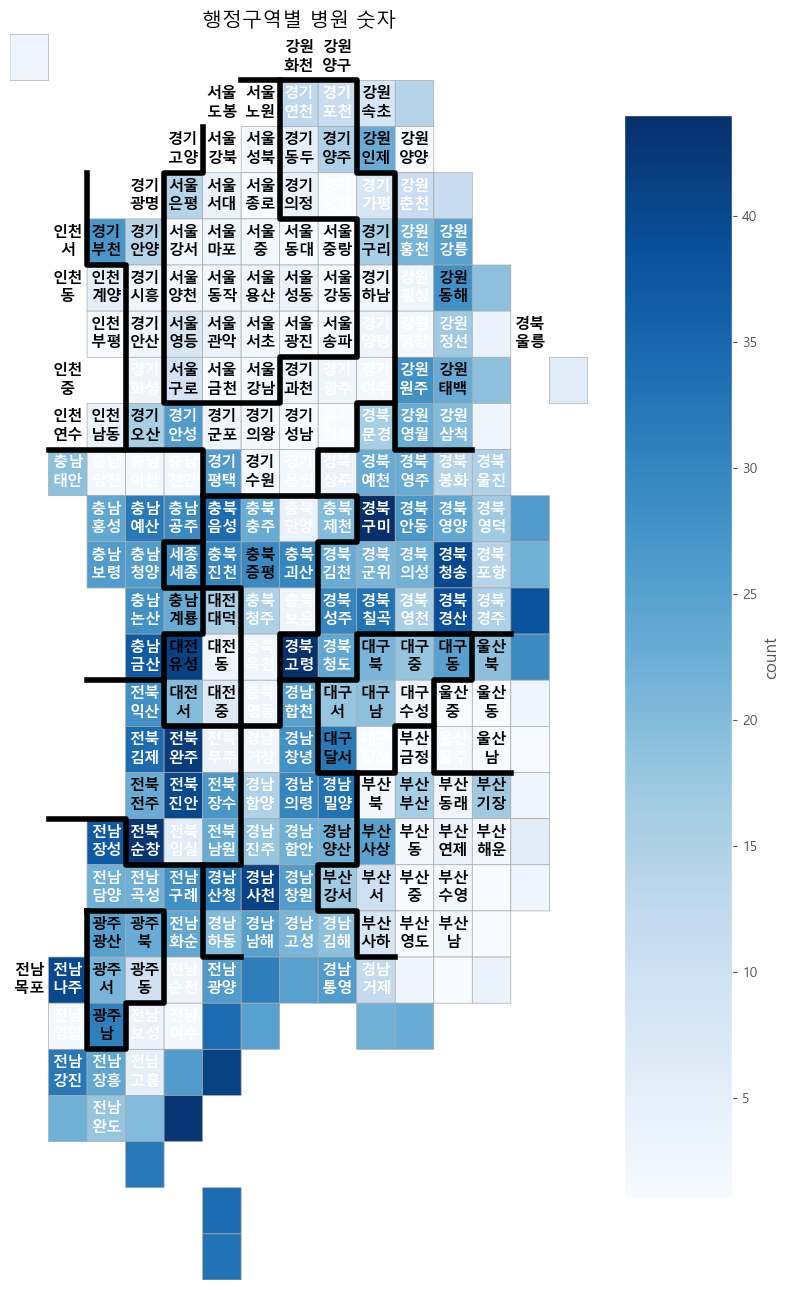

In [79]:
# 함수 이용해서 블록맵 그려보기. 
draw_blockMap(data_draw_korea_local_Hospital_Population,"count","행정구역별 병원 숫자", "Blues")

whitelabelmin 전 : 31.411500683240135
whitelabelmin 후 : 31.411500683240135
vmin 전 : 0.1794961542948942
vmin 후 : 0.1794961542948942
vmax 전 : 125.10751427007585
vmax 후 : 125.10751427007585
mapdata : x         NaN         0.0        1.0        2.0         3.0         4.0   \
y                                                                          
NaN   0.727059         NaN        NaN        NaN         NaN         NaN   
0.0        NaN         NaN        NaN        NaN         NaN         NaN   
1.0        NaN         NaN        NaN        NaN         NaN         NaN   
2.0        NaN         NaN        NaN        NaN    2.725713    0.374136   
3.0        NaN         NaN  38.883048   2.876805    0.714784    0.651129   
4.0        NaN         NaN   0.786716   0.390074    0.358447    0.360024   
5.0        NaN         NaN   1.719336   1.072635    1.545861    0.928898   
6.0        NaN         NaN        NaN   0.607468    1.453064    0.267876   
7.0        NaN         NaN   2.377118  24.30

C:\Users\it\AppData\Local\Temp\ipykernel_7904\2144720424.py:179: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink =1 , aspect = 10)


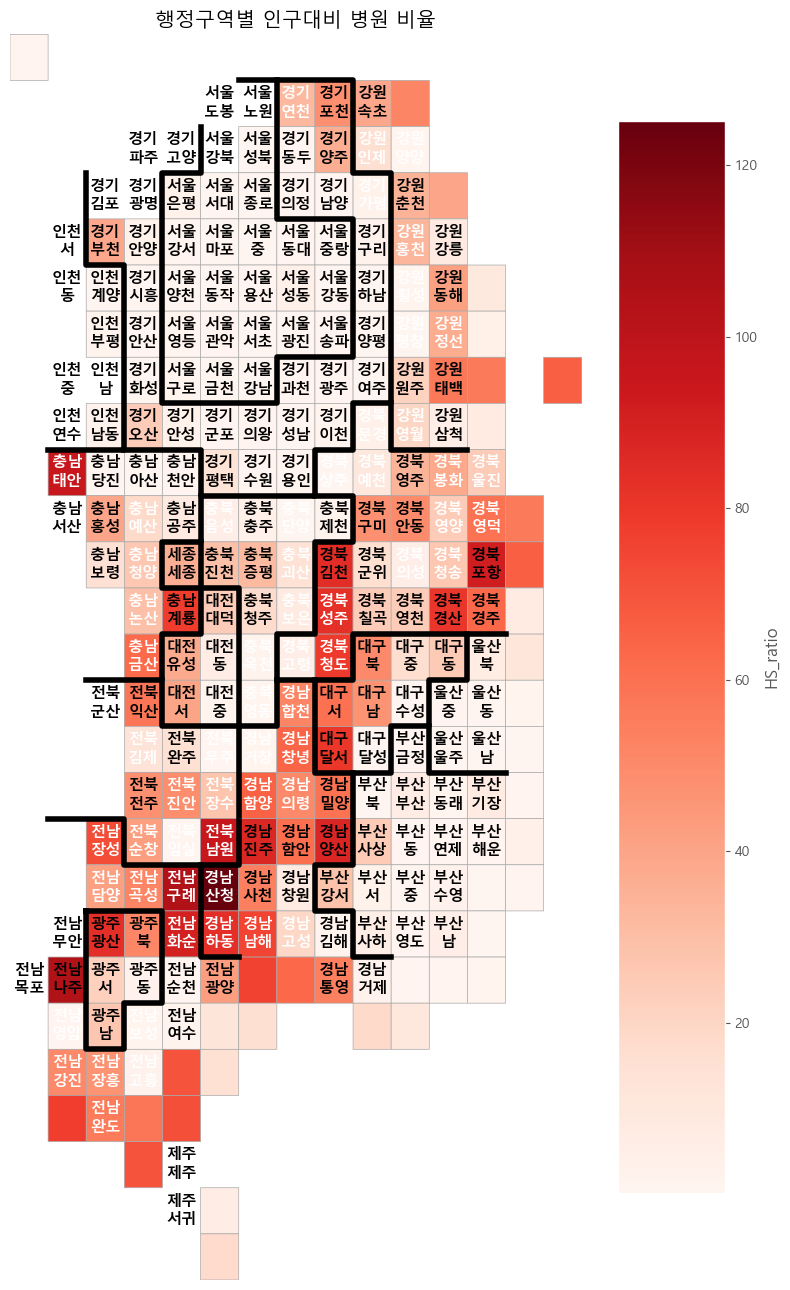

In [80]:
# 함수 이용해서 블록맵 그려보기. 
draw_blockMap(data_draw_korea_local_Hospital_Population,"HS_ratio","행정구역별 인구대비 병원 비율", "Reds")